# Домашнее задание

В этом домашнем задании вам предстоит обучить модель классификации рукописных цифр на Tensorflow.

Важным дополнительным требованием будет сохранение чекпоинтов на ваш гугл диск (не переживайтеЖ ниже будут подсказки, как это сделать). Это пригодится вам в дальнейшем при обучении более сложных моделей, на случай потери данных при неожиданном отключении Colab.

In [2]:
import tensorflow as tf
print(tf.__version__)
# from google.colab import drive
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

 #tf.enable_eager_execution()

2.16.1


####Вспомогательный код

In [65]:
#@title
def show_mnist(images, labels, predicted_labels=None):
    plt.figure(figsize=(10,10))
    for i in range(16):
        plt.subplot(4,4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.gray)
        if predicted_labels is not None:
            title_obj = plt.title(f"Real: {labels[i]}. Pred: {predicted_labels[i]}")
            if labels[i] != predicted_labels[i]:
                plt.setp(title_obj, color='r')
        else:
            plt.title(f"Real label: {labels[i]}")

def show_progress(history: dict):
    plt.figure(figsize=(10, 5))
    ax1 = plt.subplot(1,2,1)
    plt.plot(history["accuracy"],label='train accuracy')
    plt.plot(history["val_accuracy"], label='test accuracy')
    ax2 = plt.subplot(1,2,2)
    plt.plot(history["loss"],label='train_loss')
    plt.plot(history["val_loss"],label='test_loss')

    ax1.legend(loc='best')
    ax2.legend(loc='best')
    plt.grid()
    plt.tight_layout()
    plt.show()

## Загрузка данных

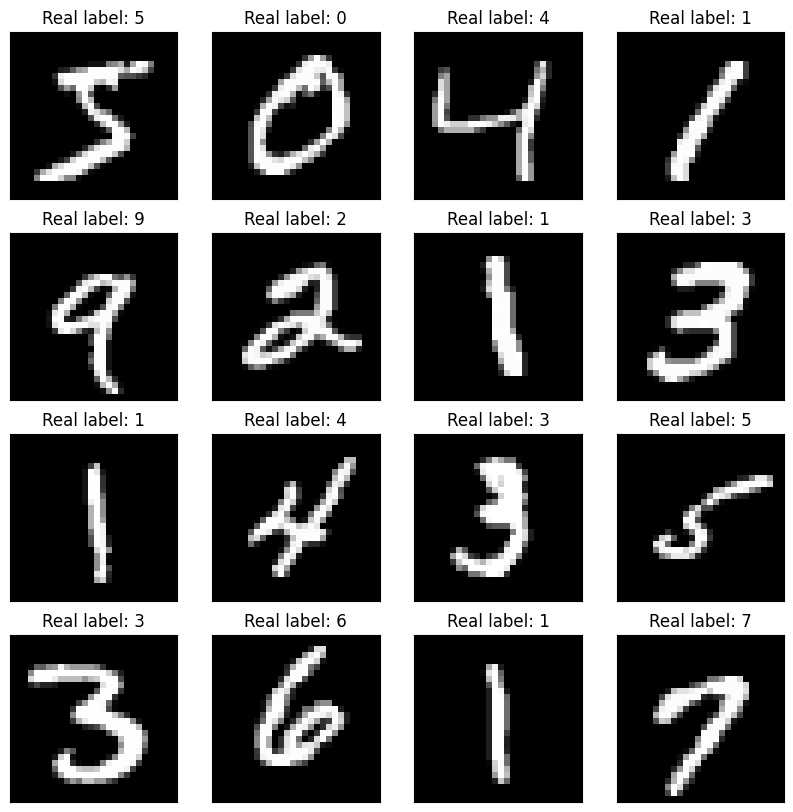

In [4]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

show_mnist(x_train, y_train)
x_train = x_train.reshape((-1, 28*28)) # вытянули каждую картинку в вектор
x_test = x_test.reshape((-1, 28*28))


In [ ]:
# прикрепим ваш гугл диск к виртуальной машине
# drive.mount('/content/drive/')

In [6]:
# Путь до вашего гугл диска скорее всего выглядит так: /content/drive/My Drive/
# если эта клетка вызывает ошибку,
# измените путь согласно ! ls "/content/drive/"

path = Path("model_mnist")
path.mkdir(exist_ok=True) # папка создается на вашем гугл диске. вместе с "родителями"
assert path.exists()
cpt_filename = "best_checkpoint.keras"
cpt_path =str(path / cpt_filename)
# После выполнения этой клетки, в вашем гугл диске должна создаться папка: Skillbox/model_1
# убедитесь в этом

А весь код ниже вы реализуете самостоятельно! Вы уже к этому готовы :)
Требования к модели:
1. Точность на тестовой части выборки >96%
2. Чекпоинт модели с лучшими параметрами должен быть сохранен у вас на гугл диске
3. Объект history, который получается из model.fit(...) должен содержать значения лосса и accuracy для трейна и теста

In [55]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [38]:
np.argmax(np.array([[0.1074895,  0.05947207, 0.07811061, 0.12818459, 0.09410247, 0.10363418,
  0.07304627, 0.15049498, 0.13146693, 0.07399844]]))

7

In [62]:
# < YOUR CODE STARTS HERE >
checkpoint = tf.keras.callbacks.ModelCheckpoint(cpt_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(128, input_dim=x_train.shape[1], activation="relu"))
# model.add(tf.keras.layers.Dense(200, activation="relu"))
model.add(tf.keras.layers.Dense(10))
# model.add(tf.keras.layers.Dense(1))
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])
history = model.fit(
    x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=64, verbose=0,
    callbacks=[checkpoint]
)
# print(model.predict(x_train[:10]), y_train[0:10])
# < YOUR CODE ENDS HERE >


Epoch 1: val_accuracy improved from -inf to 0.95640, saving model to model_mnist/best_checkpoint.keras

Epoch 2: val_accuracy improved from 0.95640 to 0.96420, saving model to model_mnist/best_checkpoint.keras

Epoch 3: val_accuracy did not improve from 0.96420

Epoch 4: val_accuracy did not improve from 0.96420

Epoch 5: val_accuracy improved from 0.96420 to 0.96710, saving model to model_mnist/best_checkpoint.keras

Epoch 6: val_accuracy did not improve from 0.96710

Epoch 7: val_accuracy did not improve from 0.96710

Epoch 8: val_accuracy improved from 0.96710 to 0.96990, saving model to model_mnist/best_checkpoint.keras

Epoch 9: val_accuracy did not improve from 0.96990

Epoch 10: val_accuracy did not improve from 0.96990

Epoch 11: val_accuracy did not improve from 0.96990

Epoch 12: val_accuracy did not improve from 0.96990

Epoch 13: val_accuracy improved from 0.96990 to 0.97060, saving model to model_mnist/best_checkpoint.keras

Epoch 14: val_accuracy did not improve from 0.9

In [63]:
assert len(list(path.glob("*"))) != 0, f"Checkpoint dir {path}"
assert "accuracy" in history.history, "History object must contain Accuracy. Please, retrain with this metric"
assert "val_accuracy" in history.history, "Please, provide validation_data in model.fit."
assert np.max(history.history["val_accuracy"]) > 0.95, "Validation accuracy must be more than 0.95"
# Для старой версии (tf.__version__ == 1.x) запустить aseert-ы ниже:
# assert "acc" in history.history, "History object must contain Accuracy. Please, retrain with this metric"
# assert "val_acc" in history.history, "Please, provide validation_data in model.fit."
# assert np.max(history.history["val_acc"]) > 0.95, "Validation accuracy must be more than 0.95"
print("Training tests passed")

Training tests passed


Давайте посмотрим на графики обучения:

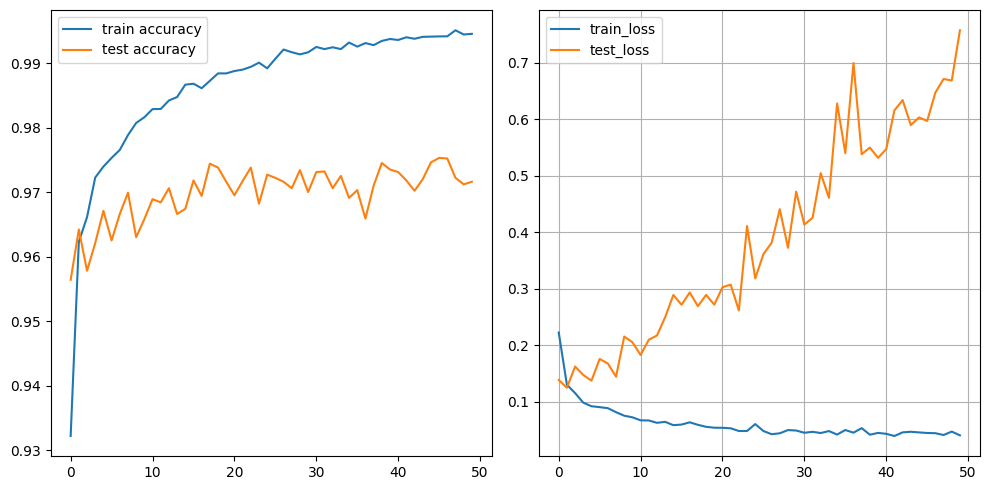

In [66]:
show_progress(history.history)

А теперь перейдем к загрузке модели. Если все реализовано правильно, то код ниже должен сработать без ошибок:

In [67]:
restored_model = tf.keras.models.load_model(cpt_path)
loss, acc = restored_model.evaluate(x_test, y_test)
print(f"Accuracy of restored model {acc*100 :.2f}%")
assert acc > 0.96

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - accuracy: 0.9694 - loss: 0.7831
Accuracy of restored model 97.53%


И, наконец, можно сравнить предсказания с реальными классами (с такой точностью найти ошибку будет сложно):

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step


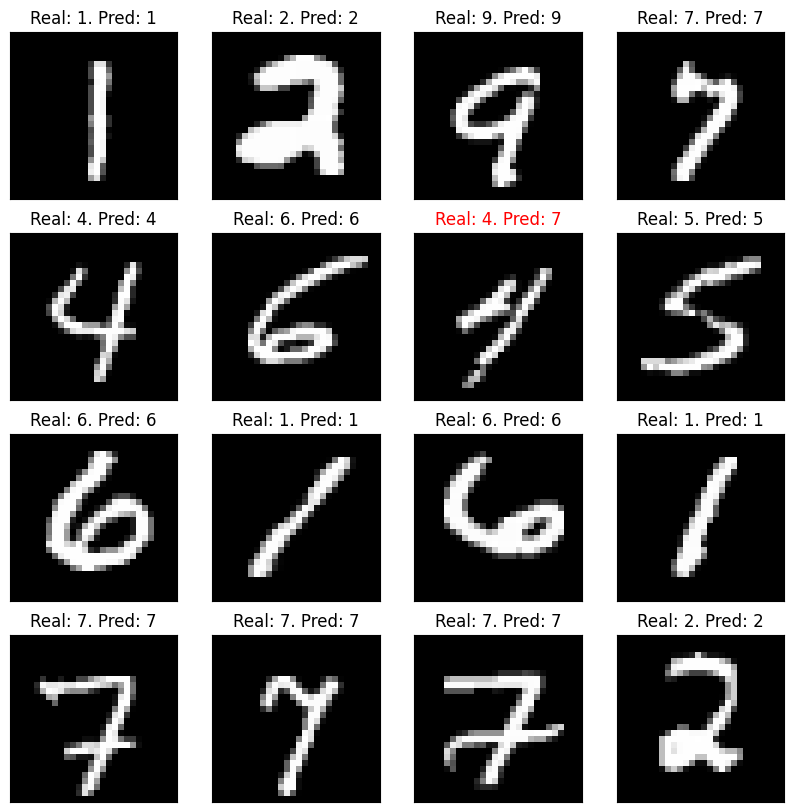

In [69]:
predict_x=model.predict(x_test) 
predicted_labels=np.argmax(predict_x,axis=1)
# predicted_labels = restored_model.predict_classes(x_test)
idxs = np.random.choice(np.arange(len(x_test)), 16, replace=False)
show_mnist(x_test[idxs].reshape((-1, 28, 28)), y_test[idxs], predicted_labels[idxs])